# quickstart with transients


The `Transient` object has a **rate**, a **template** and a **model**.

- The **rate** informs on how many target we expect to have in nature for a redshift range. *This is a float*

- The **model** specifies how the template parameters are drawn. *This is a dict.*

- The **template** provides the spectro-photometric time serie of the transient given input parameters. *This is based on sncosmo.Model*

The first two enables you to draw a sample of transients as given by nature. This last one is needed only if you want to get the transient lightcurves (hence, notably, when you create a dataset). 

Two sets of transient have already been implemented:
- SNeIa (based on salt2 or salt3)
- A generic Transient associated to any single sncosmo.TimeSerieSource (see the list [here](https://sncosmo.readthedocs.io/en/stable/source-list.html))

## SNeIa and "v19-2010al (a type IIb)" Examples

In [1]:
from skysurvey import target

Let's start with Type Ia Supernovae.

The **SNeIa** Transient is already defined and ready to use. 

In [2]:
snia = target.SNeIa()

### template, rate and model

**The following methods and attribute are commun to all transients ; sneia here is just an example**

#### template
the `template` (skysurvey object) is stored here

In [3]:
snia.template

and it's main attibute is the sncosmo_model up on which the template methods are built

In [4]:
snia.template.sncosmo_model

In [5]:
snia.template.source # short cut to snia.template.sncosmo_model.source

<SALT2Source 'salt2' version='T23' at 0x104b98eb0>

the template parameters are here (shortcut to `snia.template.parameters`)

In [6]:
snia.template_parameters # short

['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']

#### rate

Transient have the volume_rate parameter that provide the number of transient expected per year and per $Gpc^3$

In [7]:
snia.rate # in target/Gpc^3/year

23500.0

To get the number of expected transient in a redshift shell (full sky volume)  use `get_rate(z)`.

In [8]:
snia.get_rate(0.1) # Nature should provide ~8000 SNeIa (full sky) up to z=0.1

7967.328115462927

#### model

The model is the core of what defines a transient. It provides how the template parameters are generated

In [9]:
from pprint import pprint
pprint(snia.model.model)

{'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x16d378280>},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x176f54d30>,
            'kwargs': {'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1, 'x1': '@x1'}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'magabs': '@magabs', 'z': '@z'}},
 'radec': {'as': ['ra', 'dec'],
           'func': 'random',
           'kwargs': {'dec_range': [-30, 90], 'ra_range': [0, 360]}},
 'redshift': {'as': 'z', 'kwargs': {'zmax': 0.2}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1061e2640>,
        'kwargs': {'high': 57000, 'low': 56000}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x176f54ca0>}}


See details below

## Draw a sample (as given by nature)

You can then draw as many SNeIa as you want. The parameters will be drawn following the transient's model (see below).
These are SNeIa as given by nature following this model.

In [10]:
%%time
data = snia.draw(size=10_000)

CPU times: user 107 ms, sys: 6.16 ms, total: 113 ms
Wall time: 112 ms


In [11]:
data # another copy is stored as snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1585,-1.20,2.775558e-16,56141.402344,-19.184872,20.283243,0.000122,271.129730,31.871643,salt2
1,0.1925,-1.05,-1.000000e-02,56473.027344,-19.114124,20.819983,0.000075,150.331802,10.876958,salt2
2,0.1815,0.70,1.500000e-01,56102.843750,-18.899218,20.893114,0.000070,261.982971,-6.818339,salt2
3,0.1935,0.90,1.700000e-01,56155.753906,-18.849602,21.097019,0.000058,216.532272,33.285145,salt2
4,0.1735,-0.50,3.000000e-02,56216.339844,-19.057701,20.626425,0.000089,356.948364,34.682629,salt2
...,...,...,...,...,...,...,...,...,...,...
9995,0.0845,-0.50,-1.000000e-02,56765.117188,-19.208117,18.790850,0.000483,263.116852,-26.718391,salt2
9996,0.1845,-1.45,1.900000e-01,56382.082031,-18.527147,21.304623,0.000048,194.880554,15.215457,salt2
9997,0.1805,-1.15,-1.700000e-01,56230.175781,-19.519857,20.259193,0.000125,267.409485,14.888163,salt2
9998,0.1925,-0.40,-4.000000e-02,56140.730469,-19.492094,20.442013,0.000106,35.079403,-8.405257,salt2


In [12]:
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1585,-1.20,2.775558e-16,56141.402344,-19.184872,20.283243,0.000122,271.129730,31.871643,salt2
1,0.1925,-1.05,-1.000000e-02,56473.027344,-19.114124,20.819983,0.000075,150.331802,10.876958,salt2
2,0.1815,0.70,1.500000e-01,56102.843750,-18.899218,20.893114,0.000070,261.982971,-6.818339,salt2
3,0.1935,0.90,1.700000e-01,56155.753906,-18.849602,21.097019,0.000058,216.532272,33.285145,salt2
4,0.1735,-0.50,3.000000e-02,56216.339844,-19.057701,20.626425,0.000089,356.948364,34.682629,salt2
...,...,...,...,...,...,...,...,...,...,...
9995,0.0845,-0.50,-1.000000e-02,56765.117188,-19.208117,18.790850,0.000483,263.116852,-26.718391,salt2
9996,0.1845,-1.45,1.900000e-01,56382.082031,-18.527147,21.304623,0.000048,194.880554,15.215457,salt2
9997,0.1805,-1.15,-1.700000e-01,56230.175781,-19.519857,20.259193,0.000125,267.409485,14.888163,salt2
9998,0.1925,-0.40,-4.000000e-02,56140.730469,-19.492094,20.442013,0.000106,35.079403,-8.405257,salt2


**Tip**: You can  directly use the ``from_draw()`` classmethod to load a transient instance already drawn.

In [13]:
%%time
snia = target.SNeIa.from_draw(10000)

CPU times: user 96.4 ms, sys: 3.21 ms, total: 99.6 ms
Wall time: 98.3 ms


In [14]:
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1605,0.45,-0.01,56732.007812,-19.466558,20.031431,0.000154,184.194427,19.273294,salt2
1,0.1635,1.50,0.06,56870.460938,-19.417931,20.124226,0.000142,218.540802,-8.557636,salt2
2,0.1915,-1.45,0.13,56613.082031,-18.606897,21.314634,0.000047,111.631454,37.862663,salt2
3,0.1895,0.05,-0.05,56388.660156,-19.489265,20.406935,0.000109,343.986511,72.687332,salt2
4,0.1895,0.15,-0.05,56788.558594,-19.617203,20.278997,0.000123,258.468475,23.385582,salt2
...,...,...,...,...,...,...,...,...,...,...
9995,0.1765,0.55,0.07,56526.109375,-19.178711,20.546524,0.000096,139.221832,30.202585,salt2
9996,0.1965,-1.25,0.12,56106.414062,-18.668491,21.315315,0.000047,10.405370,-25.884926,salt2
9997,0.1405,-0.30,0.32,56641.117188,-18.020502,21.161707,0.000054,229.352707,48.340553,salt2
9998,0.1435,0.25,-0.08,56527.382812,-19.408857,19.823296,0.000187,133.656464,16.397158,salt2


### TimeSerieTransient (TSTransient)

**nothing is easier than loading any sncosmo TimeSerieSouce as a skysurvey Transient**

Simply provide the source name in the `from_sncosmo_source()` method or directly in the `from_draw()`

In [15]:
snIIn = target.TSTransient.from_draw("v19-2010al", 4000)

In [16]:
snIIn.data

,z,t0,magabs,magobs,amplitude,ra,dec,template
0,0.0135,56603.335938,-16.269585,17.636774,3.020587e-15,316.705200,-35.829140,v19-2010al
1,0.0335,57082.238281,-16.714043,19.198025,7.171200e-16,141.125000,50.678215,v19-2010al
2,0.0395,56722.277344,-18.004375,18.274914,1.678170e-15,167.595474,-42.461002,v19-2010al
3,0.0465,56589.984375,-16.958166,19.686335,4.573695e-16,108.540947,-18.273939,v19-2010al
4,0.0455,56953.820312,-17.822235,18.773504,1.060229e-15,142.548676,10.587902,v19-2010al
...,...,...,...,...,...,...,...,...
3995,0.0325,56151.812500,-19.213379,16.631294,7.625766e-15,104.208183,-31.617971,v19-2010al
3996,0.0345,57005.480469,-18.772194,17.205326,4.494394e-15,140.128860,-14.389994,v19-2010al
3997,0.0175,57434.183594,-18.388599,16.087790,1.258014e-14,93.770340,-15.564441,v19-2010al
3998,0.0475,57287.593750,-16.604507,20.087749,3.160104e-16,328.185974,30.212753,v19-2010al


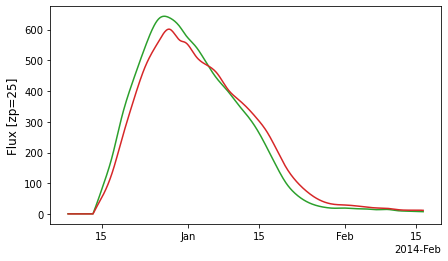

In [17]:
_ = snIIn.show_lightcurve(["ztfg","ztfr"], index=50)

***

## Model

The ``data`` (list of transients) are generated following the **model**, stored as ``self.model``.

**tip**: the transient model is display (better formated) when you print the object

In [18]:
snia

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x176f54ca0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x16d378280>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1061e2640>,
        'kwargs': {'low': 56000, 'high': 57000}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x176f54d30>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': 'random',
           'kwargs': {'ra_range': [0, 360], 'dec_range': [-30, 90]},
           'as': ['ra', 'dec']}}

#### How does **model** works

It is based on the [modeldag](https://github.com/MickaelRigault/modeldag) package.

To generate ``data``, the code reads **model** line-by-line and follows the instructions it contains. 

In this SNeIa example, **model** contains 8 entries. So the generated ``data`` will contains at least 8 columns (see the *as* option).

A **model** entry accepts 3 keywords:
  1. *func*: (name of) the function used to draw the sample, e.g. np.random.uniform ;
  2. *kwargs*: options that enter the function as kwargs. Use ``a='@key'`` to use the result of a previously drawn 'key' as `'a'` input entering func ;
  3. *as*: (list of) name(s) of the column on the resulting ``data`` ;

#### "@" in "kwargs" to form a "DAG"
The *@* trick in kwargs  enables you to generate self-consistent parameters.

For instance, the absolute magnitude of a SNeIa depends on its stretch and color (following the ``alpha*x_1 - beta*c `` Tripp's relation). Hence, once the ``x_1``and ``c`` (independent) variables have been drawn, the SNeIa absolute magnitude (``magabs``) can be obtained using as input the already drawn ``x_1`` and ``c`` parameters. Same goes for the observed magnitude, it only dependents on the absolute magnitude ``magabs`` and the redshift ``z``. 

The (potentially complex) connections between the variables enabled by using *@key* (e.g. ``@c``) corresponds to the creation a [Directed acyclic graph](https://en.wikipedia.org/wiki/Directed_acyclic_graph).
You can complexify as you which your **model** creating as many variables and intermediate variables as you want.

#### the *func* option, where to define the function

The *func* option is the function that will be used to generate the dataset. In principle, it should accept ``size`` as parameters and return N=size values except if a "@" is used in input (for its size is alreadyu defined by the initial called key)

In your **model**, the *func* option can be a function or a string. 
 - a function will be used as such
 - a string will be converted in function, it typically means you input a method of the class ; though more advanced tools exist, see "Build a new Model" documentation.

## Plotting

Show a given lightcurve in any band known by sncosmo, for instance here that on the snia index 9 ``snia.data.loc[9]``

### Lightcurve 

/Users/rigault/miniforge3/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


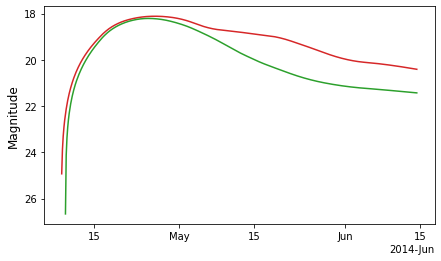

In [19]:
band = ["ztfr","ztfg"]
fig = snia.show_lightcurve(band, index=9, in_mag=True)

### Parameters (visualize the relation created by self.model)

You can also show the scatter between any parameters. The parameter correlations have handle by your `model`

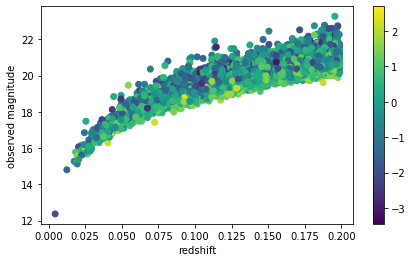

In [20]:
fig = snia.show_scatter("z", "magobs", ckey="x1") 
ax = fig.axes[0]

_ = ax.set_ylabel("observed magnitude")
_ = ax.set_xlabel("redshift")

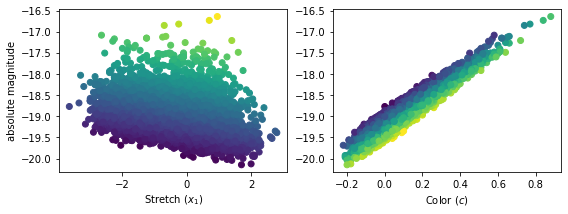

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[9,3])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

_ = snia.show_scatter("x1", "magabs", ckey="c", ax=ax1) 
_ = snia.show_scatter("c", "magabs", ckey="x1", ax=ax2) 

_ = ax1.set_ylabel("absolute magnitude")
_ = ax1.set_xlabel(fr"Stretch ($x_1$)")
_ = ax2.set_xlabel(fr"Color ($c$)")

## Getter

You have several pre-defined method to access parameters or the template directly

### template parameters

the `get_template_parameters` method enbales you to get the subpart of ``data`` that corresponds to actual template (sncosmo.Model) parameters

In [22]:
snia.get_template_parameters()

,z,x1,c,t0,x0
0,0.1095,-0.60,-1.500000e-01,56517.967681,0.000425
1,0.0905,0.30,6.000000e-02,56364.946816,0.000390
2,0.1935,1.15,-4.000000e-02,56054.140675,0.000112
3,0.1825,1.20,3.000000e-02,56109.130970,0.000105
4,0.1715,0.90,7.000000e-02,56876.907700,0.000103
...,...,...,...,...,...
9995,0.1955,1.40,4.000000e-02,56042.622210,0.000090
9996,0.1745,0.60,-9.000000e-02,56529.363219,0.000152
9997,0.0855,-1.15,-5.000000e-02,56015.677557,0.000502
9998,0.1635,-1.95,2.775558e-16,56392.338277,0.000097


You can also request to only have the template parameter for a given target
(similar to as `snia.get_template_parameters().loc[index]`)

In [23]:
snia.get_template_parameters(index=9)

z         0.173500
x1       -0.950000
c         0.070000
t0    56825.027215
x0        0.000079
Name: 9, dtype: float64

### Template (sncosmo.Model)

You can get a template (sncosmo.Model) either with default values

In [24]:
template = snia.get_template() # default

In [25]:
template

In [26]:
template.parameters

array([0. , 0. , 1. , 0. , 0. , 0. , 3.1])

or with parameter set to that of a target 

In [27]:
template_target9 = snia.get_template(index=9) 
template_target9.parameters

array([ 1.73500000e-01,  5.68250272e+04,  7.89874808e-05, -9.50000000e-01,
        7.00000000e-02,  0.00000000e+00,  3.10000000e+00])

or affecting parameters

In [28]:
template_target9 = snia.get_template(index=9, x1=-5) 
template_target9.parameters

array([ 1.73500000e-01,  5.68250272e+04,  7.89874808e-05, -5.00000000e+00,
        7.00000000e-02,  0.00000000e+00,  3.10000000e+00])